In [1]:
# This notebook is for Section 2: Data Analysis of the Twine Take Home Assignment
# Source Data: user_data.csv

# import necessary modules

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# import data set... currently in same dir as notebook. Using encoding as UTF-8 as determined by file

user_data = pd.read_csv('user_data.csv', sep=",", encoding='utf-8')

# looking at first 10 lines to see if data imported as expected

user_data.head(10)

,userid,acqusition_date,churn_date,age,gender,income,account_type,attribution_source,active_goals,total_funds,active_deposits
0,914806,2018-06-23,NaN,41,female,76000.0,Cash,Organic,2,1137.067435,260
1,937075,2018-06-09,NaN,32,female,85000.0,Invested,Organic,1,373.752679,80
2,286139,2018-08-31,NaN,30,male,59000.0,Invested,Organic,3,533.925229,260
3,830447,2018-05-02,2018-09-20,29,male,58000.0,Invested,Organic,0,0.000000,0
4,641745,2018-07-26,NaN,36,female,77000.0,Invested,Organic,1,607.353796,150
5,519095,2018-02-13,2018-04-23,24,female,57000.0,Invested,Google,0,0.000000,0
6,736588,2018-07-12,NaN,45,female,64000.0,Cash,Feedmob,1,261.823720,80
7,134666,2018-05-21,NaN,34,female,41000.0,Invested,Facebook,1,227.689699,40
8,656992,2018-08-21,NaN,47,male,102000.0,Cash,Google,1,266.845482,150
9,705064,2018-07-20,NaN,32,male,27000.0,Invested,Feedmob,1,109.206875,30


In [3]:
# update the acquisition_date col label

user_data.rename(columns={'acqusition_date': 'acquisition_date'}, inplace=True)

user_data.head(10)

,userid,acquisition_date,churn_date,age,gender,income,account_type,attribution_source,active_goals,total_funds,active_deposits
0,914806,2018-06-23,NaN,41,female,76000.0,Cash,Organic,2,1137.067435,260
1,937075,2018-06-09,NaN,32,female,85000.0,Invested,Organic,1,373.752679,80
2,286139,2018-08-31,NaN,30,male,59000.0,Invested,Organic,3,533.925229,260
3,830447,2018-05-02,2018-09-20,29,male,58000.0,Invested,Organic,0,0.000000,0
4,641745,2018-07-26,NaN,36,female,77000.0,Invested,Organic,1,607.353796,150
5,519095,2018-02-13,2018-04-23,24,female,57000.0,Invested,Google,0,0.000000,0
6,736588,2018-07-12,NaN,45,female,64000.0,Cash,Feedmob,1,261.823720,80
7,134666,2018-05-21,NaN,34,female,41000.0,Invested,Facebook,1,227.689699,40
8,656992,2018-08-21,NaN,47,male,102000.0,Cash,Google,1,266.845482,150
9,705064,2018-07-20,NaN,32,male,27000.0,Invested,Feedmob,1,109.206875,30


In [4]:
# looks good, let's get a sense of the size of data

user_data.shape

(19804, 11)

In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19804 entries, 0 to 19803
Data columns (total 11 columns):
userid                19804 non-null int64
acquisition_date      19804 non-null object
churn_date            6758 non-null object
age                   19804 non-null int64
gender                19804 non-null object
income                19804 non-null float64
account_type          19804 non-null object
attribution_source    19804 non-null object
active_goals          19804 non-null int64
total_funds           19804 non-null float64
active_deposits       19804 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 1.7+ MB


In [6]:
# Note: shape looks clean as there are 19,804 rows and no nulls in any cols except for churn_date as expected

# convert acquisition_date and churn_date cols as datetime dtype
user_data['acquisition_date'] = pd.to_datetime(user_data['acquisition_date'])
user_data['churn_date'] = pd.to_datetime(user_data['churn_date'])

user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19804 entries, 0 to 19803
Data columns (total 11 columns):
userid                19804 non-null int64
acquisition_date      19804 non-null datetime64[ns]
churn_date            6758 non-null datetime64[ns]
age                   19804 non-null int64
gender                19804 non-null object
income                19804 non-null float64
account_type          19804 non-null object
attribution_source    19804 non-null object
active_goals          19804 non-null int64
total_funds           19804 non-null float64
active_deposits       19804 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 1.7+ MB


##### Before beginning the analysis process, undergo QC of the data for: outliers, bad data, etc.

In [7]:
user_data.describe()

# Age looks good, no values under 18 as expected and oldest user is 70.
# Income also looks good, no negative values or major outliers
# active_goals also good... no negative values or major outliers
# total_funds is good same as above, values seem low given that p50 income is $55k but p50 of funds is only $152. 
# active_deposits also looks good with no negative values and no major outliers

,userid,age,income,active_goals,total_funds,active_deposits
count,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000,19804.000000
mean,498226.592911,33.588366,57919.410220,0.907897,285.135151,80.338820
std,290134.986965,9.386381,20715.867555,0.798676,394.004454,81.121708
min,26.000000,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,242918.500000,26.000000,43000.000000,0.000000,0.000000,0.000000
50%,500141.500000,34.000000,55000.000000,1.000000,152.285173,70.000000
75%,748278.750000,39.000000,70000.000000,1.000000,405.884733,130.000000
max,999992.000000,70.000000,183000.000000,4.000000,5663.937775,720.000000


In [8]:
# lets check for NaNs/nulls outside of churn date

# returns any rows where there is null data
user_data[user_data[['userid','acquisition_date','age','gender','income','account_type',
                     'attribution_source','active_goals','total_funds','active_deposits']].isnull().any(axis=1)]

# Excellent - no rows with null values.  Thus will not remove any data from the dataset

,userid,acquisition_date,churn_date,age,gender,income,account_type,attribution_source,active_goals,total_funds,active_deposits


### Question 1: What does the average Twine customer look like? Are any types of customers more valuable than others?

In [9]:
# get gender stats, also verify the values for gender.. appear only "male" and "female" values exist
print(((user_data['userid'].groupby(user_data['gender']).count()) / 19804) * 100)
print(((user_data['userid'].groupby(user_data['account_type']).count()) / 19804) * 100)
print(((user_data['userid'].groupby(user_data['attribution_source']).count()) / 19804) * 100)

gender
female    53.963846
male      46.036154
Name: userid, dtype: float64
account_type
Cash        29.140578
Invested    70.859422
Name: userid, dtype: float64
attribution_source
Facebook     22.869117
Feedmob      15.067663
Google       19.758635
Instagram    11.881438
Organic      30.423147
Name: userid, dtype: float64


From the data summary, the average Twine customer is 33.5 years of age, making ~ $58,000/annually.  Slightly more than half of users are female and 70% of users have holdings in an investment account (vs. ~30% in cash).

In [10]:
# Presuming that valuable customers is defined as those that those with a higher than average "total_funds", let's 
# see if there's anything we can see from the data

# getting the median user qualities
avg_age = user_data['age'].agg('median')
avg_income = user_data['income'].agg('median')
avg_attr_source = user_data['attribution_source'].mode()[0]
avg_act_depos = user_data['active_deposits'].agg('median')


# get p75/top 25 percentile of users (by total_funds) 
p75_age = user_data['age'].loc[user_data['total_funds'] >= user_data['total_funds'].quantile(0.75)].agg('median')
p75_income = user_data['income'].loc[user_data['total_funds'] >= user_data['total_funds'].quantile(0.75)].agg('median')
p75_attr_source = user_data['attribution_source'].loc[user_data['total_funds'] >= user_data['total_funds'].quantile(0.75)].mode()[0]
p75_act_depos = user_data['active_deposits'].loc[user_data['total_funds'] >= user_data['total_funds'].quantile(0.75)].agg('median')


p25_age = user_data['age'].loc[user_data['total_funds'] >= user_data['total_funds'].quantile(0.25)].agg('median')
p25_income = user_data['income'].loc[user_data['total_funds'] >= user_data['total_funds'].quantile(0.25)].agg('median')
p25_attr_source = user_data['attribution_source'].loc[user_data['total_funds'] >= user_data['total_funds'].quantile(0.25)].mode()[0]
p25_act_depos = user_data['active_deposits'].loc[user_data['total_funds'] >= user_data['total_funds'].quantile(0.25)].agg('median')


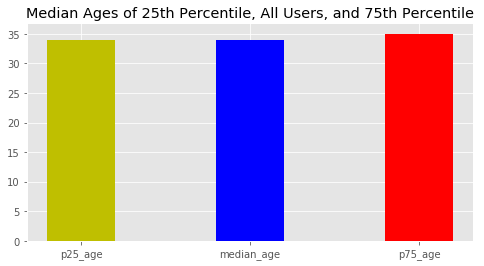

In [11]:
# Plot the averages vs. the p75

fig = plt.figure(figsize=(8,4))

plt.bar(['p25_age','median_age','p75_age'],[p25_age,avg_age,p75_age], color=['y','b','r'], width=0.4)
plt.title('Median Ages of 25th Percentile, All Users, and 75th Percentile')


plt.show()

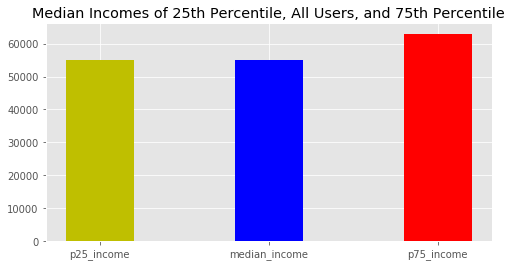

In [12]:
# Plot the averages vs. the p75

fig2 = plt.figure(figsize=(8,4))
plt.bar(['p25_income','median_income','p75_income'],[p25_income,avg_income,p75_income], color=['y','b','r'], width=0.4)
plt.title('Median Incomes of 25th Percentile, All Users, and 75th Percentile')
plt.tight_layout
plt.show()

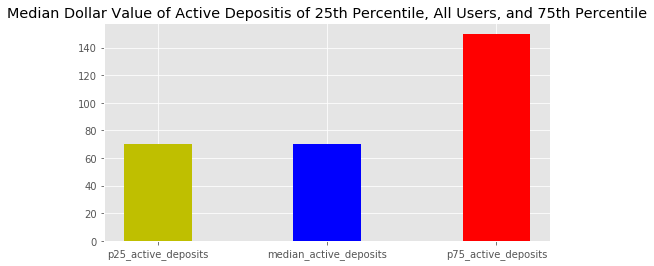

In [13]:
fig3 = plt.figure(figsize=(8,4))
plt.bar(['p25_active_deposits','median_active_deposits','p75_active_deposits'],[p25_act_depos,avg_act_depos,p75_act_depos], color=['y','b','r'], width=0.4)
plt.title('Median Dollar Value of Active Depositis of 25th Percentile, All Users, and 75th Percentile')
plt.tight_layout
plt.show()

In [14]:
print('The most common attribution source for 25th Percentile is {}'.format(p25_attr_source))
print('The most common attribution source Overall is {}'.format(avg_attr_source))
print('The most common attribution source for 75hth Percentile is {}'.format(p75_attr_source))

The most common attribution source for 25th Percentile is Organic
The most common attribution source Overall is Organic
The most common attribution source for 75hth Percentile is Organic


The more "valuable" users tend to have higher incomes and tend to contribute more on a monthly basis (by a factor of nearly 2.5).  Though it is natural for a user with more income to contribute more proportionally, I would be interested in looking for data about this cohort's attitude towards savings.  I hypothesize that our more "valuable" users have a different attitude towards savings and that we can increase total funds from our users with education intiatives.

There is little to no difference between valuable and non-valuable users based on age and income level.

#### Question 2: What is the survival rate of Twine’s customers? What factors influence survival rate and how?

In [15]:
# Find survival rate which is (# users - # users that survived/ #users). 

churned_users = user_data['churn_date'].count() #could also use the 6758 count from user_data.describe
num_users = user_data.shape[0]

survival_rate = ((num_users - churned_users)/ num_users) * 100

print('The survival rate of Twine customers is: {:.2f}%'.format(survival_rate))

The survival rate of Twine customers is: 65.88%


In [16]:
# Two approaches to see what influences survival rate
# 1) Compare age, income, gender, attribution source from those that churned and current users
# 2) I suspect account age may be a factor

# Begin with the first approach

# get the median churn user values
churn_age = user_data['age'].loc[user_data['churn_date'].notnull()].agg('median')
churn_income = user_data['income'].loc[user_data['churn_date'].notnull()].agg('median')
churn_attr_source = user_data['attribution_source'].loc[user_data['churn_date'].notnull()].mode()[0]
churn_gender = user_data['gender'].loc[user_data['churn_date'].notnull()].groupby(user_data['gender']).count()


# get active user values
active_age = user_data['age'].loc[user_data['churn_date'].isnull()].agg('median')
active_income = user_data['income'].loc[user_data['churn_date'].isnull()].agg('median')
active_attr_source = user_data['attribution_source'].loc[user_data['churn_date'].isnull()].mode()[0]
active_gender = user_data['active_deposits'].loc[user_data['churn_date'].isnull()].groupby(user_data['gender']).count()

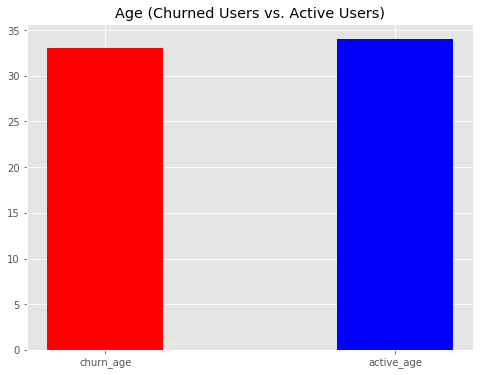

In [17]:
fig = plt.figure(figsize=(8,6))

plt.bar(['churn_age','active_age'],[churn_age, active_age], width=0.4, color=['r','b'])
plt.title('Age (Churned Users vs. Active Users)')
plt.show()

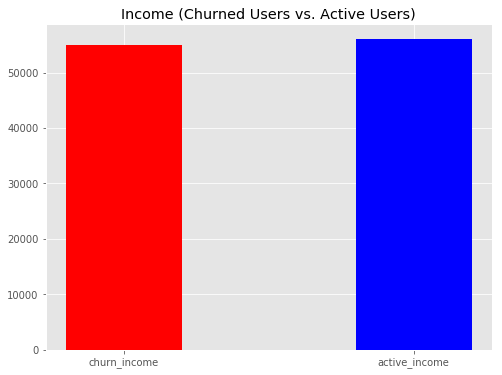

In [18]:
fig = plt.figure(figsize=(8,6))

plt.bar(['churn_income','active_income'],[churn_income, active_income], width=0.4, color=['r','b'])
plt.title('Income (Churned Users vs. Active Users)')
plt.show()

In [19]:
churn_gender

gender
female    3299
male      3459
Name: gender, dtype: int64

In [20]:
active_gender

gender
female    7388
male      5658
Name: active_deposits, dtype: int64

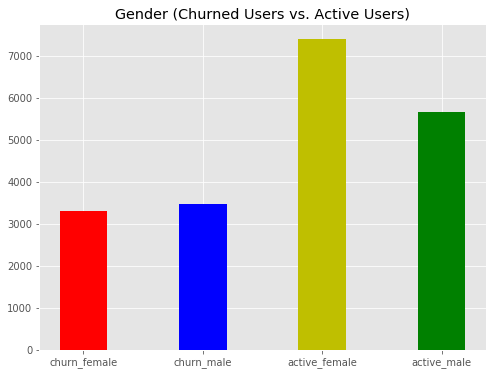

In [21]:
fig = plt.figure(figsize=(8,6))

plt.bar(['churn_female','churn_male','active_female','active_male'],
        [churn_gender[0], churn_gender[1], active_gender[0], active_gender[1]], width=0.4, color=['r','b','y','g'])
plt.title('Gender (Churned Users vs. Active Users)')
plt.show()

In [22]:
print('The most common attribution source for Churned Users is {}'.format(churn_attr_source))
churn_attr_count = user_data['attribution_source'].loc[user_data['churn_date'].notnull()].groupby(user_data['attribution_source']).count()
print(churn_attr_count/churn_attr_count.sum()*100)

print('The most common attribution source for Active Users  is {}'.format(active_attr_source))
active_attr_count = user_data['attribution_source'].loc[user_data['churn_date'].isnull()].groupby(user_data['attribution_source']).count()
print(active_attr_count/active_attr_count.sum()*100)

The most common attribution source for Churned Users is Facebook
attribution_source
Facebook     26.250370
Feedmob      21.885173
Google       22.343889
Instagram    10.091743
Organic      19.428825
Name: attribution_source, dtype: float64
The most common attribution source for Active Users  is Organic
attribution_source
Facebook     21.117584
Feedmob      11.536103
Google       18.419439
Instagram    12.808524
Organic      36.118350
Name: attribution_source, dtype: float64


With respect to the gender visualization, I would expect to see a similar proportion of male/female in the churned cohort as in the active cohort.  However, this doesn't seem to the the case.  The data suggests that males churn at a higher rate than females.  The difference in gender consumption behavior warrants additional research as it is difficult to determine with the data we have.  

We see no difference in the income or age levels of the churn and active cohorts. 

It seems that the composition of the attribution source differs greatly between the two cohorts which may indicate the marketing channel demographic is a factor.  We see that most of the churned users came from Facebook, Google and Feedmob whereas the active users mostly came from Organic sources, followed by Facebook and Google.  Users from Feedmob churned at nearly twice the rate of active users.  I would look into decreasing ad spend in Feedmob and increasing in Organic channels.

In [23]:
# Approach 2 - seeing account age. Plot the varying time deltas of acq date and churn date, then compare to avg age of active

user_data['churned_acct_age'] =  user_data['churn_date'] - user_data['acquisition_date']
user_data['active_acct_age'] = pd.to_datetime('today') - user_data['acquisition_date']

In [24]:
user_data['churned_acct_age'].describe()

count                        6758
mean     115 days 21:01:51.867416
std       52 days 04:18:21.104619
min               0 days 00:00:00
25%              78 days 00:00:00
50%             111 days 00:00:00
75%             149 days 00:00:00
max             312 days 00:00:00
Name: churned_acct_age, dtype: object

In [25]:
user_data['active_acct_age'].describe()

count                       19804
mean     176 days 12:00:54.967656
std       81 days 03:58:38.834290
min       62 days 22:33:35.298903
25%      107 days 22:33:35.298903
50%      162 days 22:33:35.298903
75%      232 days 22:33:35.298903
max      391 days 22:33:35.298903
Name: active_acct_age, dtype: object

At a high level, the data suggests that, on average, users will churn between 111 and 115 days.  75% of churned users, left after 149 days.  Given that the average account age of an active user is 176 days, I suspect we can lift active users by pushing marketing and rentention efforts to users around the 111 day mark until the 162 day mark.

111 Days translates to roughly 3.7 months which seems like a natural savings goal length (vacation, wedding, etc.).  However, this of course warrants further analysis. 

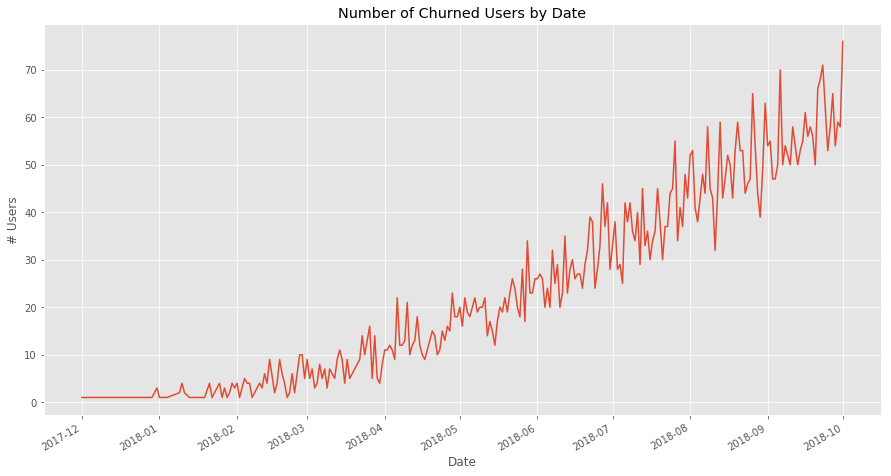

In [28]:
# Another suspicion is that users will tend to churn at the certain time of year
plt.figure(figsize=(15,8))
user_data['churn_date'].groupby(user_data['churn_date']).count().plot()
plt.title('Number of Churned Users by Date')
plt.ylabel('# Users')
plt.xlabel('Date')

plt.show()

The above 10-month plot does not lend any evidence to suggest churn is a function of seasonability.  However, we do see an increasing trend that further confirms that account age is a factor as to when a user will churn.

#### Question 3: Which attribution source provides the highest quality Twine customers? Should we invest more in any platforms? Should we treat customers from different platforms differently? How and Why?

In the above analysis, we see that users that churn tend to originate mainly from Facebook, Google and Feedmob (in that order) while active users originate from Organic channels, Facebook then Google. With the goal of acquiring users that tend to not churn, we should increase ad spend/marketing in Organic Channels and decrease spend in Feedmob (if any).

Since Facebook and Google have nearly equal rates of active/churn, we ought to reevaluate the type of marketing (such as demographic targeting, messaging, etc.) with user retention in mind. Perhaps we can offer two types of campaigns, one geared towards those likely to remain active users after ~176 days and one towards those we predict will churn.

Lastly, since users from Feedmob are almost twice as likely to churn, we should treat these customers differently. These customers are likely from ads served in other mobile apps as may require more frequent notifications/retention efforts as they may generally see more ads from competitors.
